In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint
%matplotlib inline

In [2]:
df = pd.read_csv('dataset/Stock Headlines.csv', encoding = 'ISO-8859-1')
df.dropna(inplace=True)
df.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4098 entries, 0 to 4100
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    4098 non-null   object
 1   Label   4098 non-null   int64 
 2   Top1    4098 non-null   object
 3   Top2    4098 non-null   object
 4   Top3    4098 non-null   object
 5   Top4    4098 non-null   object
 6   Top5    4098 non-null   object
 7   Top6    4098 non-null   object
 8   Top7    4098 non-null   object
 9   Top8    4098 non-null   object
 10  Top9    4098 non-null   object
 11  Top10   4098 non-null   object
 12  Top11   4098 non-null   object
 13  Top12   4098 non-null   object
 14  Top13   4098 non-null   object
 15  Top14   4098 non-null   object
 16  Top15   4098 non-null   object
 17  Top16   4098 non-null   object
 18  Top17   4098 non-null   object
 19  Top18   4098 non-null   object
 20  Top19   4098 non-null   object
 21  Top20   4098 non-null   object
 22  Top21   4098 non-null   

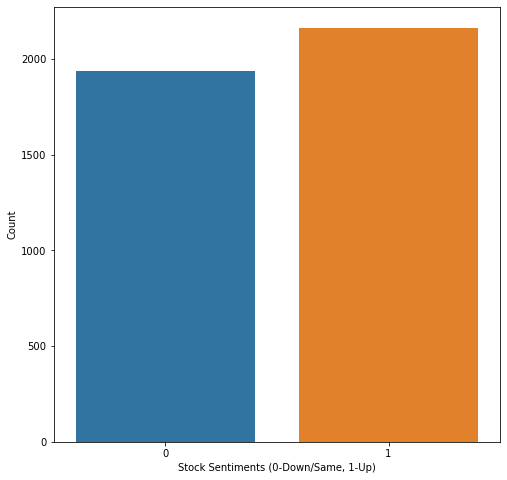

In [4]:
plt.figure(figsize=(8,8))
sns.countplot(x='Label', data=df)
plt.xlabel('Stock Sentiments (0-Down/Same, 1-Up)')
plt.ylabel('Count')
plt.show()

In [5]:
train = df[df['Date'] < '20150101']
test = df[df['Date'] > '20141231']
print('Train size: {}, Test size: {}'.format(train.shape, test.shape))

Train size: (3972, 27), Test size: (378, 27)


In [6]:
y_train = train['Label']
train = train.iloc[:, 3:28]
y_test = test['Label']
test = test.iloc[:, 3:28]

In [7]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
train.replace(to_replace='[^a-zA-Z]', value=' ', regex=True, inplace=True)
test.replace(to_replace='[^a-zA-Z]', value=' ', regex=True, inplace=True)

In [10]:
new_columns = [str(i) for i in range(0,24)]
train.columns = new_columns
test.columns = new_columns

In [11]:
for i in new_columns:
  train[i] = train[i].str.lower()
  test[i] = test[i].str.lower()

In [12]:
train_headlines = []
test_headlines = []
for row in range(0, train.shape[0]):
  train_headlines.append(' '.join(str(x) for x in train.iloc[row, 0:25]))
for row in range(0, test.shape[0]):
  test_headlines.append(' '.join(str(x) for x in test.iloc[row, 0:25]))

In [13]:
ps = PorterStemmer()
train_corpus = []
for i in range(0, len(train_headlines)):
  words = train_headlines[i].split()
  words = [word for word in words if word not in set(stopwords.words('english'))]
  words = [ps.stem(word) for word in words]
  headline = ' '.join(words)
  train_corpus.append(headline)

In [14]:
test_corpus = []
for i in range(0, len(test_headlines)):
  words = test_headlines[i].split()
  words = [word for word in words if word not in set(stopwords.words('english'))]
  words = [ps.stem(word) for word in words]
  headline = ' '.join(words)
  test_corpus.append(headline)

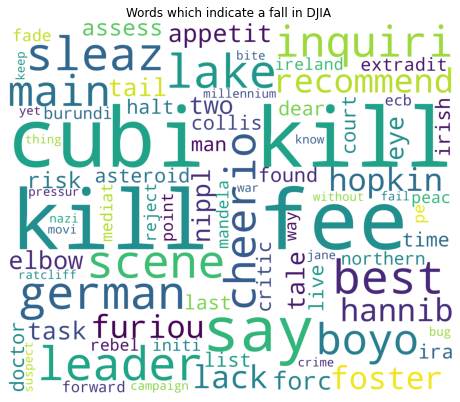

In [16]:
from wordcloud import WordCloud
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(down_words[1])
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate a fall in DJIA ")
plt.show()

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(2,2))
X_train = cv.fit_transform(train_corpus).toarray()

In [19]:
X_test = cv.transform(test_corpus).toarray()

In [20]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)

LogisticRegression()

In [21]:
lr_y_pred = lr_classifier.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, lr_y_pred)
score2 = precision_score(y_test, lr_y_pred)
score3 = recall_score(y_test, lr_y_pred)
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

Accuracy score is: 85.19%
Precision score is: 0.86
Recall score is: 0.85


In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, lr_y_pred)

array([[159,  27],
       [ 29, 163]], dtype=int64)

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [28]:
rf_y_pred = rf_classifier.predict(X_test)

In [29]:
score1 = accuracy_score(y_test, rf_y_pred)
score2 = precision_score(y_test, rf_y_pred)
score3 = recall_score(y_test, rf_y_pred)
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

Accuracy score is: 86.51%
Precision score is: 0.85
Recall score is: 0.89


In [30]:
confusion_matrix(y_test, rf_y_pred)

array([[157,  29],
       [ 22, 170]], dtype=int64)

In [31]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [32]:
nb_y_pred = nb_classifier.predict(X_test)

In [33]:
score1 = accuracy_score(y_test, nb_y_pred)
score2 = precision_score(y_test, nb_y_pred)
score3 = recall_score(y_test, nb_y_pred)
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

Accuracy score is: 83.07%
Precision score is: 0.84
Recall score is: 0.83


In [34]:
confusion_matrix(y_test, nb_y_pred)

array([[155,  31],
       [ 33, 159]], dtype=int64)

In [36]:
import re
def stock_prediction(sample_news):
  sample_news = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_news)
  sample_news = sample_news.lower()
  sample_news_words = sample_news.split()
  sample_news_words = [word for word in sample_news_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_news = [ps.stem(word) for word in sample_news_words]
  final_news = ' '.join(final_news)
  temp = cv.transform([final_news]).toarray()
  return lr_classifier.predict(temp)

In [39]:
sample_test = df[df['Date'] > '20141231']
sample_test.reset_index(inplace=True)
sample_test = sample_test['Top1']

In [40]:
row = randint(0,sample_test.shape[0]-1)
sample_news = sample_test[row]
print('News: {}'.format(sample_news))
if stock_prediction(sample_news):
  print('Prediction: The stock price will remain the same or will go down.')
else:
  print('Prediction: The stock price will go up!')

News: Martin Schkreli - Turing CEO who increased the price of Aids drug by 5000% - has been arrested
Prediction: The stock price will go up!


In [41]:
row = randint(0,sample_test.shape[0]-1)
sample_news = sample_test[row]
print('News: {}'.format(sample_news))
if stock_prediction(sample_news):
  print('Prediction: The stock price will remain the same or will go down.')
else:
  print('Prediction: The stock price will go up!')

News: France will press its G7 partners this month to launch an "irreversible" process to control the prices of new medicines, part of a global drive to make life-saving drugs more affordable
Prediction: The stock price will remain the same or will go down.


In [42]:
row = randint(0,sample_test.shape[0]-1)
sample_news = sample_test[row]
print('News: {}'.format(sample_news))
if stock_prediction(sample_news):
  print('Prediction: The stock price will remain the same or will go down.')
else:
  print('Prediction: The stock price will go up!')

News: Astronomers have discovered what they say is the largest known structure in the universe: an incredibly big hole. The supervoid, as it is known, is a spherical blob 1.8 billion light years across that is distinguished by its unusual emptiness.
Prediction: The stock price will go up!


In [43]:
row = randint(0,sample_test.shape[0]-1)
sample_news = sample_test[row]
print('News: {}'.format(sample_news))
if stock_prediction(sample_news):
  print('Prediction: The stock price will remain the same or will go down.')
else:
  print('Prediction: The stock price will go up!')

News: Reports of gun fire, possible explosions near Saint-Denis area of Paris, France
Prediction: The stock price will remain the same or will go down.
